In [3]:
#Sanzhar Zhanabek



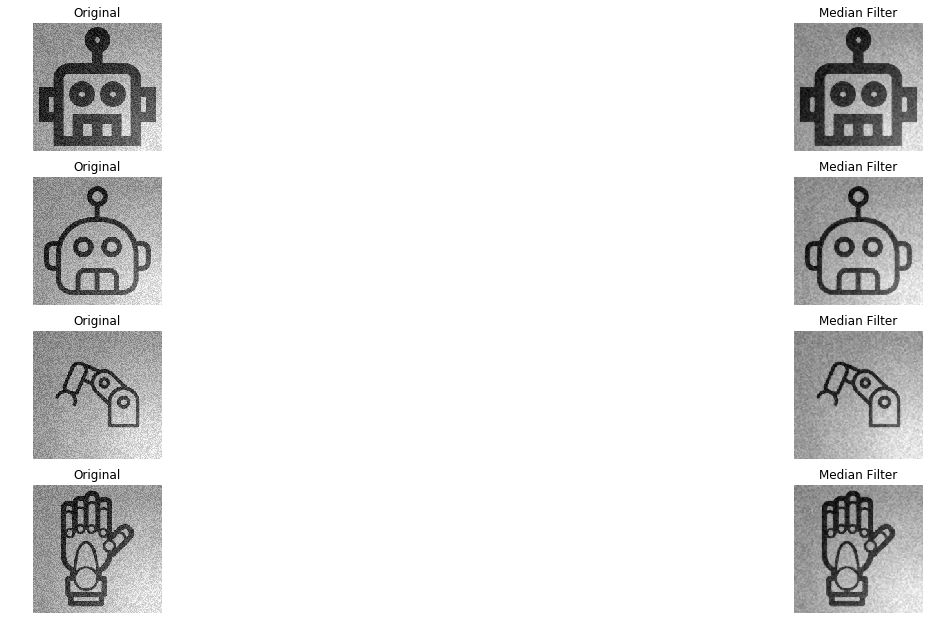

In [2]:
from scipy import ndimage 
import numpy as np 
import matplotlib.image as img 
import matplotlib.pyplot as plt 
from skimage import color
from skimage import util 

import matplotlib.image as pltimg 
img1 = img.imread("C:/Users/Samsung/Desktop/Machine Vision/final/data2/Head/0.png")
img2 = img.imread("C:/Users/Samsung/Desktop/Machine Vision/final/data2/Head/2.png")
img3 = img.imread("C:/Users/Samsung/Desktop/Machine Vision/final/data2/Arms/4.png")
img4 = img.imread("C:/Users/Samsung/Desktop/Machine Vision/final/data2/Arms/274.png")
fig = plt.figure(figsize=(25,25)) 

flt = ndimage.median_filter(img1, 3)
plt.subplot(921)
plt.axis('off')
plt.title('Original') 
plt.imshow(img1,cmap='gray') 
plt.subplot(922) 
plt.axis('off')
plt.title('Median Filter') 
plt.imshow(flt,cmap='gray')

flt = ndimage.median_filter(img2, 3)
plt.subplot(923) 
plt.axis('off')
plt.title('Original') 
plt.imshow(img2,cmap='gray') 
plt.subplot(924) 
plt.axis('off')
plt.title('Median Filter') 
plt.imshow(flt,cmap='gray')

flt = ndimage.median_filter(img3, 3)
plt.subplot(925) 
plt.axis('off')
plt.title('Original') 
plt.imshow(img3,cmap='gray') 
plt.subplot(926)
plt.axis('off')
plt.title('Median Filter') 
plt.imshow(flt,cmap='gray')


flt = ndimage.median_filter(img4, 3)
plt.subplot(927) 
plt.title('Original') 
plt.axis('off')
plt.imshow(img4,cmap='gray') 
plt.subplot(928) 
plt.axis('off')
plt.title('Median Filter') 
plt.imshow(flt,cmap='gray')

plt.show()

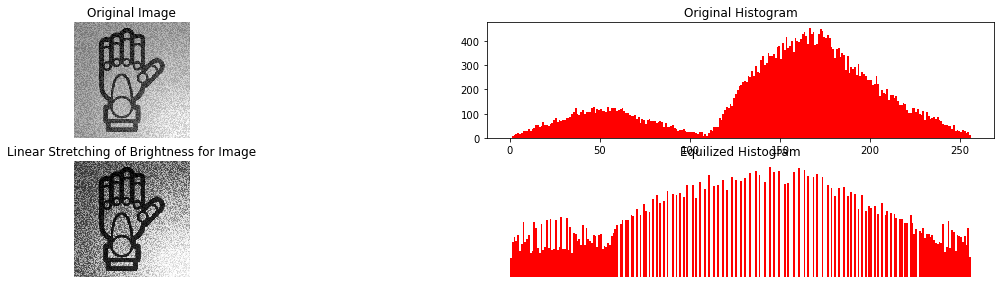

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as pltimg

im = cv2.imread('C:/Users/Samsung/Desktop/Machine Vision/final/data2/Arms/274.png', 0)
equalizer = cv2.equalizeHist(im)
fig = plt.figure(figsize=(20,20))

plt.subplot(821) 
plt.axis('off')
plt.title('Original Image')
plt.imshow(im, cmap='gray')
plt.subplot(822)
plt.title("Original Histogram")
plt.hist(im.ravel(),256,[0,256], color = 'r')
plt.subplot(823) 
plt.axis('off')
plt.title('Linear Stretching of Brightness for Image')
plt.imshow(equalizer, cmap='gray')
plt.subplot(824)
plt.axis('off')
plt.title("Equilized Histogram")
plt.hist(equalizer.ravel(),256,[0,256], color = 'r')
plt.show()

In [6]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from scipy import ndimage
from PIL import Image

%matplotlib inline


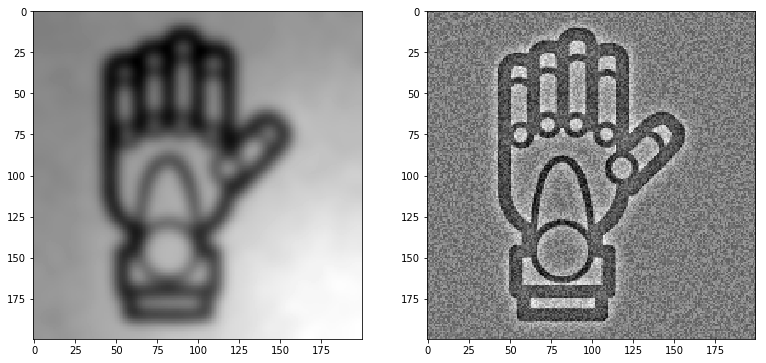

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage as nimg 
import numpy as np
arms = img.imread('C:/Users/Samsung/Desktop/Machine Vision/final/data2/Arms/274.png')
gflt = nimg.gaussian_filter(arms, sigma = 4)
fig = plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.imshow(gflt, cmap='gray')
plt.subplot(132)
plt.imshow(arms, cmap = 'gray')
plt.imshow((arms-gflt), cmap = 'gray')
maxValue = (arms - gflt).max()
minValue = (arms - gflt).min()
plt.show()

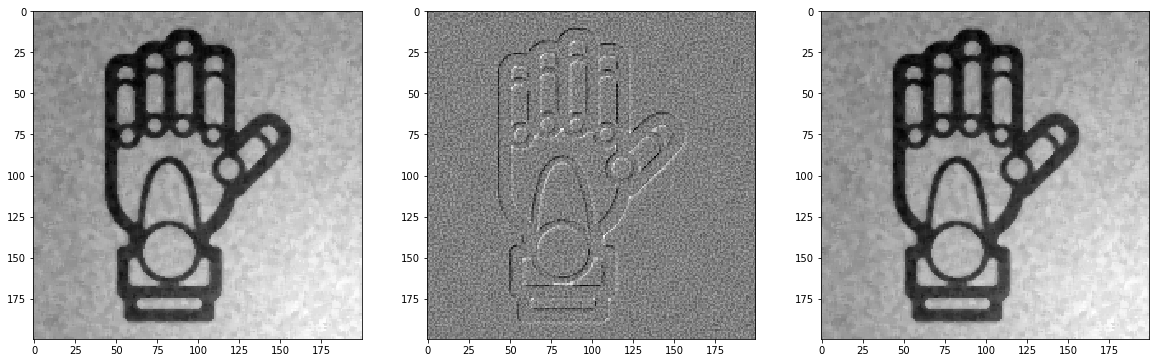

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage as nimg 
import numpy as np
arms = img.imread('C:/Users/Samsung/Desktop/Machine Vision/final/data2/Arms/274.png')
gflt = nimg.median_filter(arms, 4)
fig = plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.imshow(gflt, cmap='gray')
plt.subplot(132)
plt.imshow(arms, cmap = 'gray')
plt.imshow((arms-gflt), cmap = 'gray')
maxValue = (arms - gflt).max()
minValue = (arms - gflt).min()
newImage = (gflt-minValue)/(maxValue-minValue)


plt.subplot(133)
plt.imshow(newImage, cmap='gray')
plt.show()

In [4]:
import numpy as np
import os
image_size = 50 # Pixel width and height.
size = image_size,image_size
pixel_depth = 255.0 # Number of levels per pixel.
sizes = [784,622,222,473]
folders = [
    '/Users/Admin/Desktop/final/data2/Arms/',
    '/Users/Admin/Desktop/final/data2/Figure_normal_legs/',
    '/Users/Admin/Desktop/final/data2/FigureWheels/',
    '/Users/Admin/Desktop/final/data2/Head/',
]

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      img = Image.open(image_file)
      newImg = img.resize(size, Image.ANTIALIAS)
      image_data = (np.array(newImg).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset

X_datasets = list()
print(X_datasets)
Y_datasets = list()
for idx in range(len(folders)):
    folder = folders[idx] 
    X_datasets.append(load_letter(folder, sizes[idx]))
    labels = np.zeros((X_datasets[-1].shape[0],len(folders)))
    labels[:,idx] = 1
    Y_datasets.append(labels)

[]
/Users/Admin/Desktop/final/data2/Arms/
Full dataset tensor: (784, 50, 50)
Mean: 0.112748
Standard deviation: 0.15943
/Users/Admin/Desktop/final/data2/Figure_normal_legs/
Full dataset tensor: (622, 50, 50)
Mean: 0.0886578
Standard deviation: 0.17902
/Users/Admin/Desktop/final/data2/FigureWheels/
Full dataset tensor: (222, 50, 50)
Mean: 0.0753042
Standard deviation: 0.184759
/Users/Admin/Desktop/final/data2/Head/
Full dataset tensor: (473, 50, 50)
Mean: 0.0373346
Standard deviation: 0.210811


Total samples number: (2101, 50, 50)
Samples for tests: 526
Samples for trains: 1575


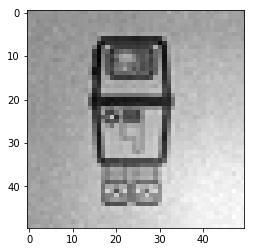

In [5]:
from sklearn.model_selection import train_test_split

X_datasets2 = np.concatenate(X_datasets)
Y_datasets2 = np.concatenate(Y_datasets)
print("Total samples number:",X_datasets2.shape)
X_trains,X_tests,Y_trains,Y_tests = train_test_split(X_datasets2,Y_datasets2,test_size=0.25)
print("Samples for tests:",Y_tests.shape[0])
print("Samples for trains:",Y_trains.shape[0])
plt.imshow(X_tests[0],cmap='gray')

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Reshape
from keras.callbacks import EarlyStopping,ModelCheckpoint
import numpy

callbacks = [
    EarlyStopping(monitor='val_loss', min_delta=0.00001, verbose=1),
    # EarlyStopping(monitor='val_loss', patience=2, verbose=0),
    ModelCheckpoint(filepath='./weights.net', verbose=1, save_best_only=True),
    
]

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

input_dim = X_trains[0].shape[0]*X_trains[0].shape[1]
print((X_trains[0].shape[0],X_trains[0].shape[1]))
print(Y_trains[0].shape[0])
# create model
model = Sequential()
model.add(Reshape((input_dim,), input_shape=(X_trains[0].shape[0],X_trains[0].shape[1])))
model.add(Dense(input_dim, input_shape = (input_dim,), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/2), init='uniform', activation='relu'))
model.add(Dense(int(input_dim), init='uniform', activation='relu'))
model.add(Dense(Y_trains[0].shape[0],init='uniform', name="output"))
model.add(Activation('softmax', name="softmax"))
model.summary()

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_trains, 
          Y_trains, 
          epochs=10, 
          batch_size=10, 
            )
# calculate predictions
results = model.evaluate(X_tests, Y_tests, batch_size=32, verbose=1, sample_weight=None)
# round predictions
print(results)

Using TensorFlow backend.


(50, 50)
4


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2500, input_shape=(2500,), activation="relu", kernel_initializer="uniform")`
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1250, activation="relu", kernel_initializer="uniform")`
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2500, activation="relu", kernel_initializer="uniform")`
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, name="output", kernel_initializer="uniform")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 2500)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2500)              6252500   
_________________________________________________________________
dense_2 (Dense)              (None, 1250)              3126250   
_________________________________________________________________
dense_3 (Dense)              (None, 2500)              3127500   
_________________________________________________________________
output (Dense)               (None, 4)                 10004     
_________________________________________________________________
softmax (Activation)         (None, 4)                 0         
Total params: 12,516,254
Trainable params: 12,516,254
Non-trainable params: 0
________________________________________________________________

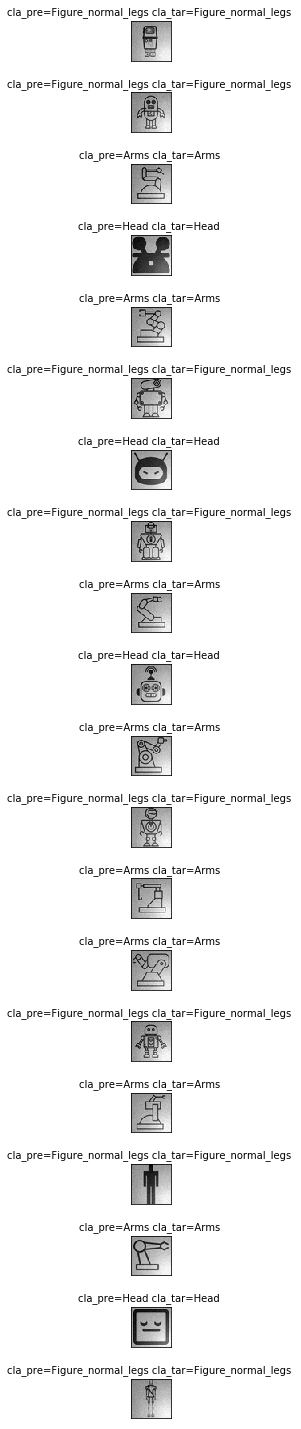

In [11]:
clazzez = ['Arms','Figure_normal_legs','FigureWheels','Head']
results = model.predict(X_tests)
errors = list()
for idx in range(len(results)):
    res = results[idx]
    cla_pre = clazzez[np.argmax(res)]
    cla_tar = clazzez[np.argmax(Y_tests[idx])]
    if cla_pre==cla_tar:
#         print(cla_pre,cla_tar)
        errors.append(idx)
# print(errors)

problems = 20
fig, axes = plt.subplots(problems, figsize=(20,20))
fig.tight_layout()
for idx in range(problems):
    err = errors[idx]
    cla_pre = clazzez[np.argmax(results[err])]
    cla_tar = clazzez[np.argmax(Y_tests[err])]    
    
    axes[idx].imshow(X_tests[err],cmap='gray')
    axes[idx].set_title("cla_pre=%s cla_tar=%s " % (cla_pre,cla_tar), fontsize=10)
    axes[idx].set_xticks([]) 
    axes[idx].set_yticks([])